In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from prep_files_for_altar import main

multi, faults, datasets, trans = main()

---------------------------------
---------------------------------
Initializing fault fault0
---------------------------------
---------------------------------
Initializing fault fault1
---------------------------------
---------------------------------
Initialize InSAR data set A064_20190704-0710
Read from file /Users/hintont/Dev/projects/Ridgecrest/data/insar/A064_20190704-0710/unwrapped.grd into data set A064_20190704-0710
---------------------------------
---------------------------------
Initialize InSAR covariance tools A064_20190704-0710
Masking data set A064_20190704-0710
     Mask: 242.12 <= Lon <= 242.7 || 35.53 <= Lat <= 35.9
Computing covariograms
Computing 1-D empirical semivariogram function for data set A064_20190704-0710
Selecting 5571 random samples to estimate the covariance function
Estimated Orbital Plane: 4.359504317804336e-06xy + -0.018281700821412943x + -0.0013217845803434013y + 5.528227535676999
Build the permutations
Digitize the histogram
Fitting Covariance 

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


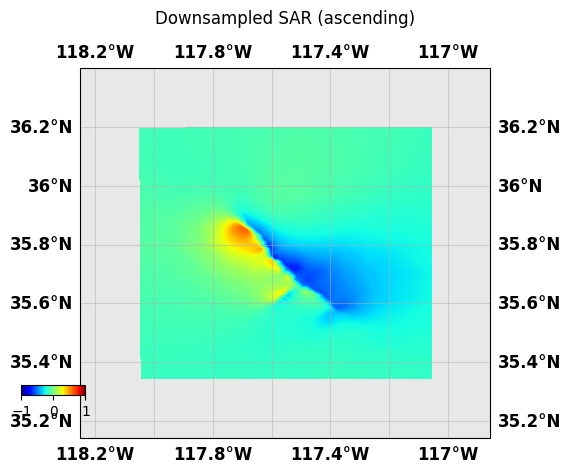

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


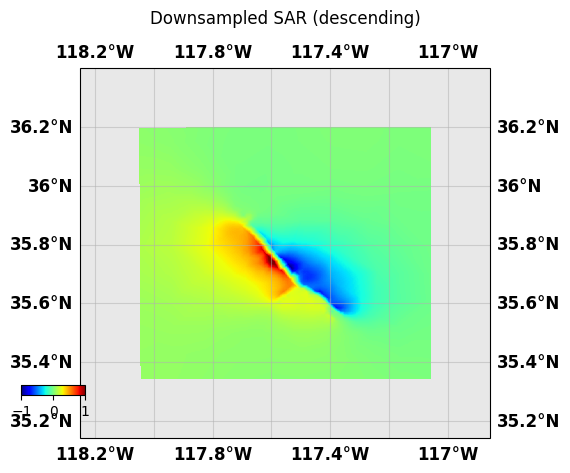

Cannot plot ellipses or quiverkey if scale is None


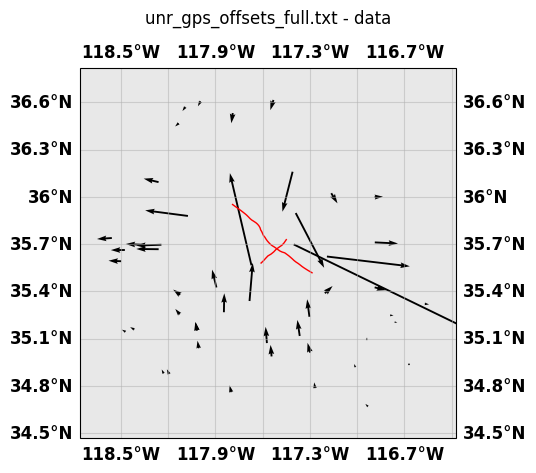

In [15]:
datasets[0].plot(plotType="flat", data="data", title="Downsampled SAR (ascending)", norm=(-1., 1.))
datasets[1].plot(plotType="flat", data="data", title="Downsampled SAR (descending)", norm=(-1., 1.))
datasets[2].plot(faults=faults)

In [16]:
# import numpy as np
# datasets[0].checkNaNs()
# print(np.sum(np.isnan( datasets[0].Cd)))
datasets[0].Cd

array([[5.35179487e-04, 1.52927760e-04, 4.14482529e-05, ...,
        8.25518996e-11, 3.35775512e-11, 2.09213472e-11],
       [1.52927760e-04, 5.35179487e-04, 1.45050448e-04, ...,
        1.84498124e-10, 7.95538634e-11, 5.08764513e-11],
       [4.14482529e-05, 1.45050448e-04, 5.35179487e-04, ...,
        3.98470034e-10, 1.84524858e-10, 1.21833958e-10],
       ...,
       [8.25518996e-11, 1.84498124e-10, 3.98470034e-10, ...,
        5.35179487e-04, 1.44196454e-04, 7.43536582e-05],
       [3.35775512e-11, 7.95538634e-11, 1.84524858e-10, ...,
        1.44196454e-04, 5.35179487e-04, 2.75959990e-04],
       [2.09213472e-11, 5.08764513e-11, 1.21833958e-10, ...,
        7.43536582e-05, 2.75959990e-04, 5.35179487e-04]], shape=(778, 778))

In [17]:
import numpy as np

for fault in faults:
   fault.buildCm(1., 1.)
trans.buildCm(1000.)
multi.assembleCm()

bounds = []
for f in range(len(faults)):
   for i in range(faults[f].N_slip):
       bounds.append([0,15.])
   for i in range(faults[f].N_slip):
       bounds.append([-2., 2.])   
for i in range(trans.TransformationParameters):
   bounds.append([-100., 100.])
mprior = np.zeros((len(bounds),))


multi.ConstrainedLeastSquareSoln(bounds=bounds, 
                              iterations=400,
                              method='L-BFGS-B',
                              mprior=mprior, 
                              tolerance=1e-7, 
                              maxfun=1e10, 
                              checkIter=True)

---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 1.0
Lambda = 1.0
Lambda0 = 0.2633518553278455
---------------------------------
---------------------------------
Assembling the Cm matrix 
Sigma = 1.0
Lambda = 1.0
Lambda0 = 0.44255408054799683
---------------------------------
---------------------------------
Computing the Constrained least squares solution
Final data space size: 1692
Final model space size: 648
Computing the inverse of the model covariance
Computing the inverse of the data covariance
Performing constrained minimzation


In [18]:
print(np.sum(np.isnan( datasets[0].Cd )))

0


In [19]:
multi.distributem()
trans.removePredictions(datasets)

#----------------------------------------
# Plot predictions and inferred slip
for data in datasets:
   data.buildsynth(multi.faults)

normalizing factors are  450.06677849773735 3953.570731482895 45.01999203633483 52.751636264706576
normalizing factors are  450.0782897422788 3953.4189022280952 45.04727138610593 52.90370512886875
No Transformation asked for object unr_gps_offsets_full.txt


Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


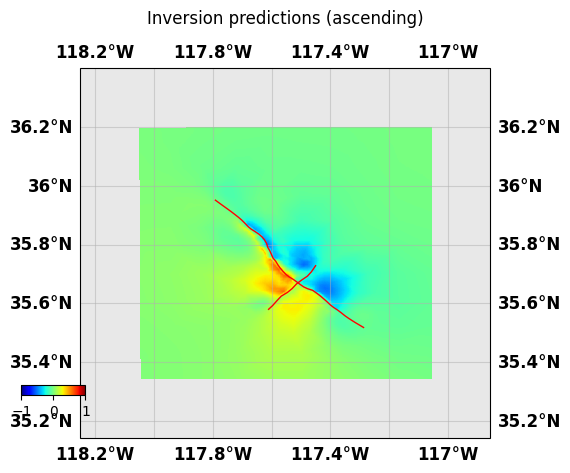

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


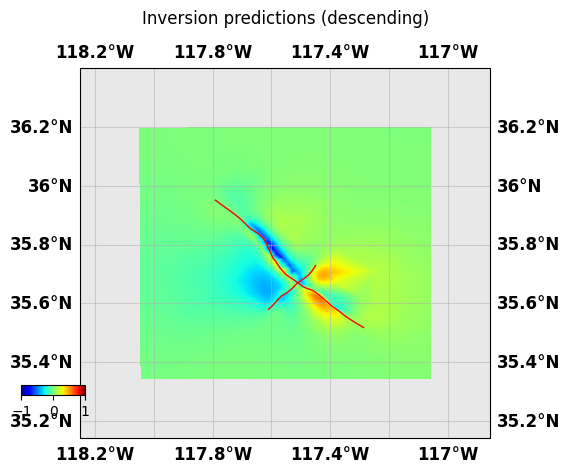

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


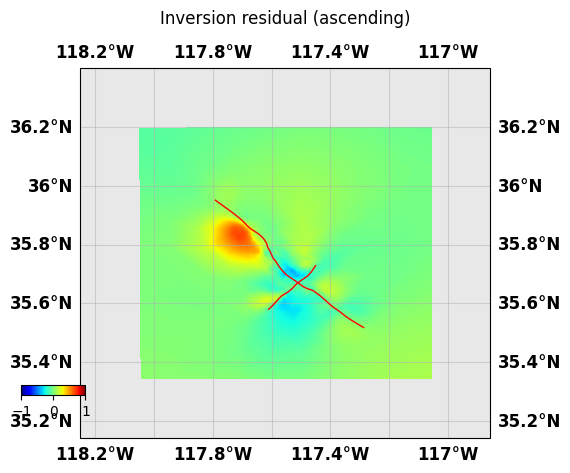

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


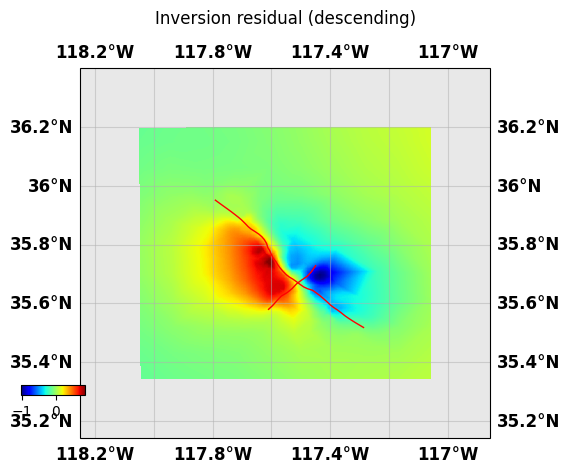

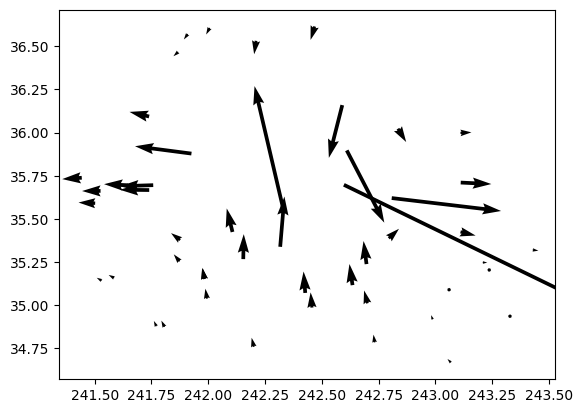

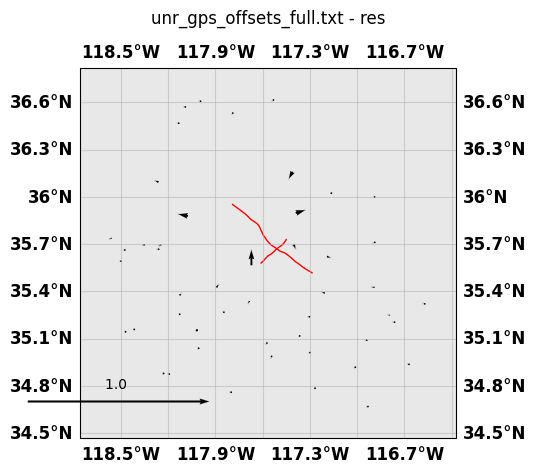

In [20]:
datasets[0].plot(plotType="flat", data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(plotType="flat", data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(plotType="flat", data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(plotType="flat", data="res", title="Inversion residual (descending)", faults=faults)
datasets[2].plot(faults=faults, data="res", legendscale=1.)

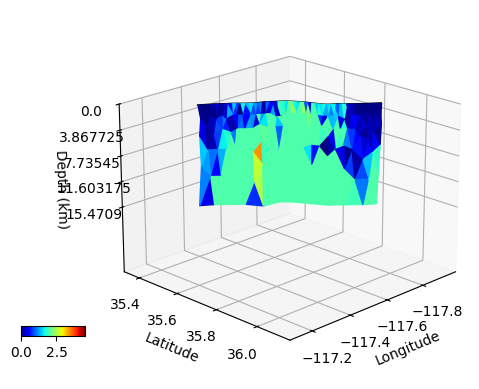

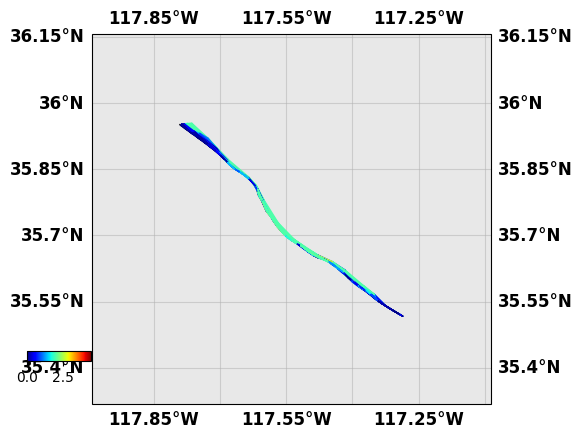

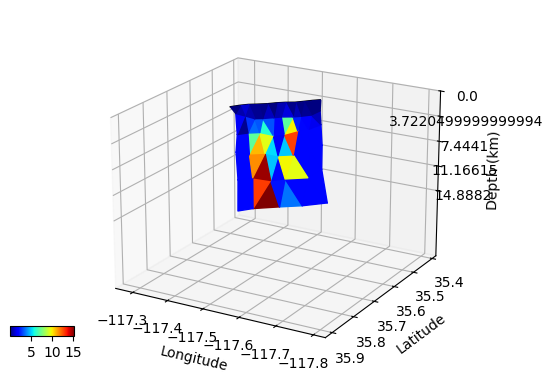

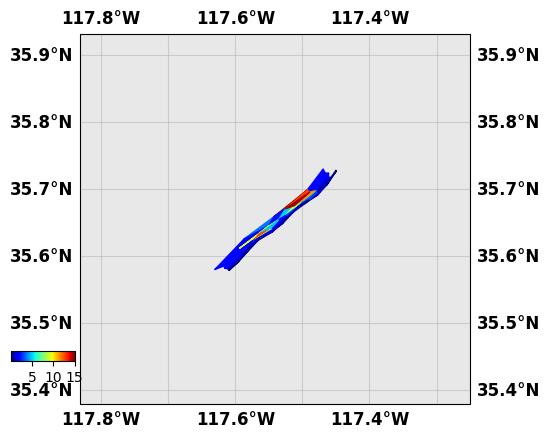

In [21]:
faults[0].plot(view=(20., 45.), norm=(0., 4.5))
faults[1].plot(view=(20., 120.))